In [10]:
import torch
import torch.utils.data.dataloader
import torchvision
import torchvision.transforms as transforms

torch.cuda.is_available()

True

In [12]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((.5, .5, .5,), (.5, .5, .5))]    
)

batch_size = 16

trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform
)

trainloader = torch.utils.data.dataloader.DataLoader(
    trainset, batch_size=batch_size, shuffle=True, num_workers=4
)

testset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform
)

testloader = torch.utils.data.dataloader.DataLoader(
    testset, batch_size=batch_size, shuffle=False, num_workers=4
)

classes = (
    'plane', 'car', 'bird', 'cat', 'deer', 
    'dog', 'frog', 'horse', 'ship', 'truck'
)

K = len(classes)

Files already downloaded and verified
Files already downloaded and verified


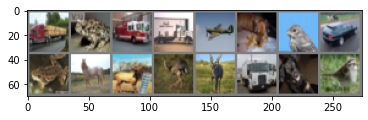

truck frog  truck truck plane dog   bird  car   frog  horse deer  bird  deer  truck dog   bird 


In [9]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2. + .5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [22]:
import torch.nn as nn
import torch.nn.functional as F

device = torch.device('cuda:0')

# Simple Model
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net().cuda()

In [23]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=.001, momentum=.9)

In [25]:
epochs = 50
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader):
        inputs, labels = data
        inputs, labels = inputs.cuda(), labels.cuda()
        
        # zero gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net.forward(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished training.')

[1,  2000] loss: 1.409
[2,  2000] loss: 1.298
[3,  2000] loss: 1.218
[4,  2000] loss: 1.155
[5,  2000] loss: 1.102
[6,  2000] loss: 1.053
[7,  2000] loss: 1.007
[8,  2000] loss: 0.981
[9,  2000] loss: 0.937
[10,  2000] loss: 0.895
[11,  2000] loss: 0.862
[12,  2000] loss: 0.840
[13,  2000] loss: 0.808
[14,  2000] loss: 0.778
[15,  2000] loss: 0.752
[16,  2000] loss: 0.724
[17,  2000] loss: 0.704
[18,  2000] loss: 0.677
[19,  2000] loss: 0.661
[20,  2000] loss: 0.622
[21,  2000] loss: 0.616
[22,  2000] loss: 0.593
[23,  2000] loss: 0.576
[24,  2000] loss: 0.556
[25,  2000] loss: 0.542
[26,  2000] loss: 0.520
[27,  2000] loss: 0.500
[28,  2000] loss: 0.492
[29,  2000] loss: 0.469
[30,  2000] loss: 0.468
[31,  2000] loss: 0.443
[32,  2000] loss: 0.446
[33,  2000] loss: 0.417
[34,  2000] loss: 0.418
[35,  2000] loss: 0.409
[36,  2000] loss: 0.385
[37,  2000] loss: 0.382
[38,  2000] loss: 0.376
[39,  2000] loss: 0.368
[40,  2000] loss: 0.358
[41,  2000] loss: 0.357
[42,  2000] loss: 0.337
[

In [26]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

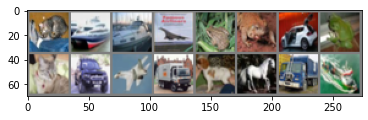

Ground Truth:  cat   ship  ship  plane frog  frog  car   frog  cat   car  


In [27]:
# test model
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('Ground Truth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(10)))

In [35]:
# train a bit more ...
net = Net().cuda()
net.load_state_dict(torch.load(PATH))

epochs = 50
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader):
        inputs, labels = data
        inputs, labels = inputs.cuda(), labels.cuda()
        
        # zero gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net.forward(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished training.')

[1,  2000] loss: 0.252
[2,  2000] loss: 0.250
[3,  2000] loss: 0.251
[4,  2000] loss: 0.253
[5,  2000] loss: 0.248
[6,  2000] loss: 0.247
[7,  2000] loss: 0.249
[8,  2000] loss: 0.250
[9,  2000] loss: 0.249
[10,  2000] loss: 0.250
[11,  2000] loss: 0.248
[12,  2000] loss: 0.249
[13,  2000] loss: 0.252
[14,  2000] loss: 0.252
[15,  2000] loss: 0.249
[16,  2000] loss: 0.253
[17,  2000] loss: 0.249
[18,  2000] loss: 0.250
[19,  2000] loss: 0.251
[20,  2000] loss: 0.252
[21,  2000] loss: 0.251
[22,  2000] loss: 0.248
[23,  2000] loss: 0.253
[24,  2000] loss: 0.252
[25,  2000] loss: 0.251
[26,  2000] loss: 0.250
[27,  2000] loss: 0.251
[28,  2000] loss: 0.250
[29,  2000] loss: 0.252
[30,  2000] loss: 0.254
[31,  2000] loss: 0.248
[32,  2000] loss: 0.249
[33,  2000] loss: 0.251
[34,  2000] loss: 0.249
[35,  2000] loss: 0.248
[36,  2000] loss: 0.254
[37,  2000] loss: 0.248
[38,  2000] loss: 0.252
[39,  2000] loss: 0.250
[40,  2000] loss: 0.255
[41,  2000] loss: 0.251
[42,  2000] loss: 0.251
[

In [36]:
# save model
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [37]:
# Evaluate performance
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].cuda(), data[1].cuda()
        # calculate outputs by running images through the network
        outputs = net.forward(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 59 %


In [ ]:
# Complex Model #!TODO
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=(3, 3)),
            nn.ReLU(),
            nn.BatchNorm2d(32, affine=False, track_running_stats=False),
            nn.Conv2d(1, 32, kernel_size=(3, 3)),
            nn.ReLU(),
            nn.BatchNorm2d(32, affine=False, track_running_stats=False),
            nn.MaxPool2d(kernel_size=(2, 2)),

            nn.Conv2d(32, 64, kernel_size=(3, 3)),
            nn.ReLU(),
            nn.BatchNorm2d(64, affine=False, track_running_stats=False),
            nn.Conv2d(32, 64, kernel_size=(3, 3)),
            nn.ReLU(),
            nn.BatchNorm2d(64, affine=False, track_running_stats=False),
            nn.MaxPool2d(kernel_size=(2, 2)),

            nn.Conv2d(64, 128, kernel_size=(3, 3)),
            nn.ReLU(),
            nn.BatchNorm2d(128, affine=False, track_running_stats=False),
            nn.Conv2d(64, 128, kernel_size=(3, 3)),
            nn.ReLU(),
            nn.BatchNorm2d(128, affine=False, track_running_stats=False),
            nn.MaxPool2d(kernel_size=(2, 2)),

            nn.Flatten(128),
            nn.Dropout(0.2),

            nn.Linear(in_features=K, out_features=1),
            nn.Softmax()
        )